# Infrasound Project Process

Exploring the sounds of horror movies below human hearing

----

##### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# import pyaudio
import os
import struct
from tkinter import TclError
import ffmpeg
import ffprobe
from ffprobe import FFProbe

In [3]:
from html.parser import HTMLParser
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup as bs
import requests
import re
import random
import os.path
import audiosegment

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
from scipy.io import wavfile # scipy library to read wav files
import numpy as np
from spectrum import Spectrogram, readwav
import scipy.io.wavfile as wave
# import sox
import wavio

In [5]:
from plotly import subplots
import plotly.graph_objects as go

In [6]:
from thinkdsp import decorate
PI2 = 2 * np.pi
from thinkdsp import read_wave
from thinkdsp import play_wave

In [7]:
# suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

----

### Importing Soundtrack Files

##### Downloading mp3 from YouTube

In [8]:
# importing packages
from pytube import YouTube
import os
  
# url input from user
yt = YouTube(
    str(input("Enter the URL of the video you want to download: \n>> ")))
  
# extract only audio
video = yt.streams.filter(only_audio=True).first()
  
# check for destination to save file
print("Enter the destination (leave blank for current directory)")
destination = str(input(">> ")) or '.'
  
# download the file
out_file = video.download(output_path=destination)
  
# save the file
base, ext = os.path.splitext(out_file)
new_file = base + '.mp3'
os.rename(out_file, new_file)
  
# result of success
print(yt.title + " has been successfully downloaded.")

Enter the URL of the video you want to download: 
>> https://www.youtube.com/watch?v=MVnSFj6XQZY
Enter the destination (leave blank for current directory)
>> 
Hereditary Soundtrack - "Reborn" - Colin Stetson has been successfully downloaded.


----

### Exploring Soundtracks using ThinkDSP

References: https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap05.ipynb#scrollTo=xudYa9DJkwHt
https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/master/code/chap01.ipynb#scrollTo=32iH1zVZqdSW

##### Reading in Wav files once Converted from mp3

In [9]:
wave = read_wave('../data/source/soundtracks/wav-files-3/2-_22---Reborn-copy.wav')
wave.normalize()
# wave.make_audio()

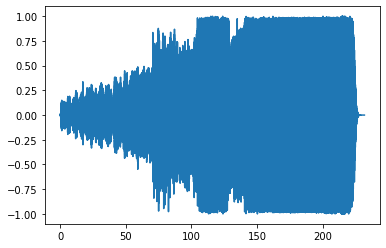

In [10]:
wave.plot()

The spectrum tells us what frequencies are present in a given sound clip

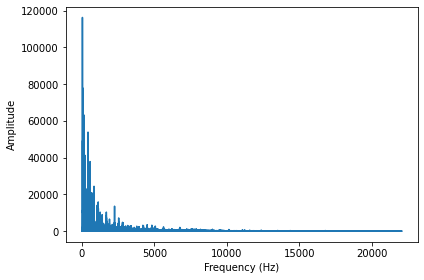

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

The spectrogram gives a better picture of how the components vary over time:

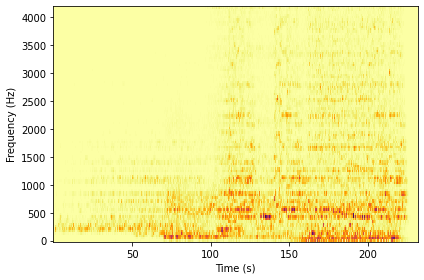

In [12]:
spectro = wave.make_spectrogram(seg_length=1024)
spectro.plot(high=4200)
decorate(xlabel='Time (s)', 
                 ylabel='Frequency (Hz)')
# plt.savefig('imgs/output/1-_01-Iraq-full-2.pdf', dpi=300)

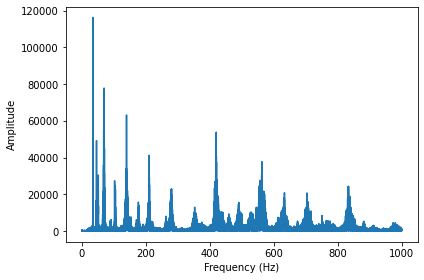

In [13]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

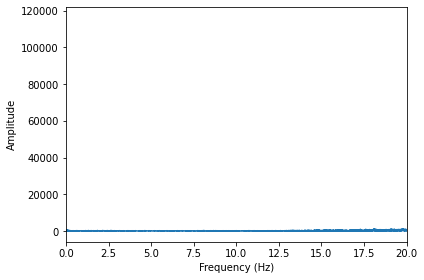

In [14]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude', xlim=(0,20))

##### Exploring the Fundamental Frequency by changing the duration of sound clip

To track the fundamental frequency, we can take a short window (changing the duration of the clip):

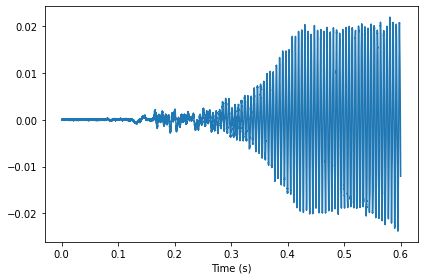

In [15]:
start = 0
duration = 0.6 #length of clip being plotted
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

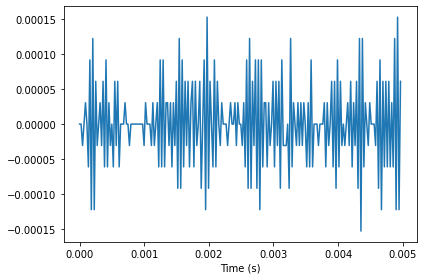

In [16]:
wave.segment(duration=0.005).plot()
decorate(xlabel='Time (s)')

In [17]:
# start = 0
# duration = 5 #length of clip being plotted
# segment = wave.segment(start, duration)
# segment.plot()
# decorate(xlabel='Time (s)')

In [18]:
# start = 0
# duration = 10 #length of clip being plotted
# segment = wave.segment(start, duration)
# segment.plot()
# decorate(xlabel='Time (s)')

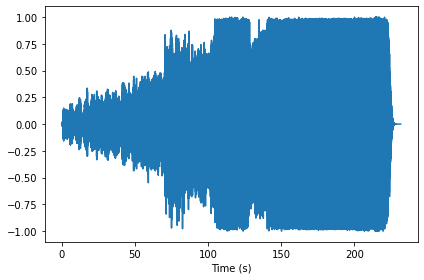

In [19]:
start = 0
duration = 5000 #length of clip being plotted
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

##### Smoothing of Lines

In [20]:
# window = np.ones(1001)

In [21]:
# segment.plot(color='gray')
# ys = np.convolve(segment.ys, window, mode='valid')
# smooth2 = Wave(ys, framerate=wave.framerate)
# smooth2.plot()
# decorate(xlabel='Time(s)')

##### Spectrum of the Wave

Spectrum computes the spectrum of the wave.

In [22]:
spectrum = segment.make_spectrum()

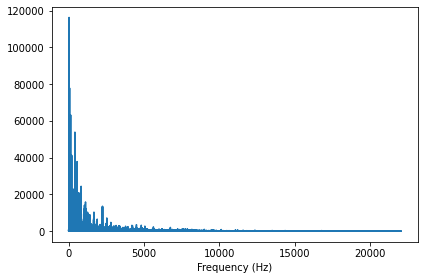

In [23]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

The highest points in the spectrum and their frequencies, in descending order:

In [24]:
spectrum.peaks()[:10]

[(116325.09889011896, 34.11878166743436),
 (112044.38515164719, 34.06264394288346),
 (111465.71832168463, 34.08423537540304),
 (110619.09396604492, 34.12309995393828),
 (108639.94752294166, 34.06696222938738),
 (105646.36403340225, 34.114463380930445),
 (103024.06832896813, 34.07991708889912),
 (97121.0316431802, 34.08855366190696),
 (90971.19563090143, 34.127418240442196),
 (87664.24523669618, 34.071280515891296)]

##### Filter sounds with a low pass filter / creating upper bounds

The frequency components above 10 kHz (10,000Hz) are small.  We can see the lower frequencies more clearly by providing an upper bound:

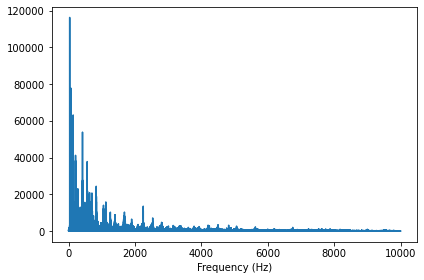

In [25]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

Human hearing is about 20 Hz to 20 kHz. In order to only see what waves are below human hearing, we can provide an upper bound of 20Hz.

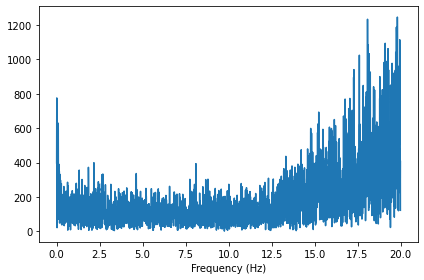

In [26]:
spectrum.plot(high=20)
decorate(xlabel='Frequency (Hz)')

Spectrum provides low_pass, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

In [27]:
spectrum.low_pass(20)

The result is a spectrum with fewer components.

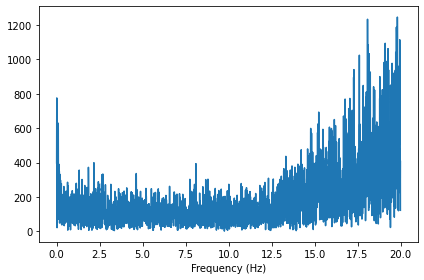

In [28]:
spectrum.plot(high=20)
decorate(xlabel='Frequency (Hz)')

In [29]:
spectrum.peaks()[:10]

[(1246.4852088888506, 19.816616766467067),
 (1233.924382102492, 18.080665591893137),
 (1187.6702929501519, 19.760479041916167),
 (1153.601079615648, 19.764797328420084),
 (1136.0020097973988, 19.82093505297098),
 (1114.6944729857369, 19.954801934592354),
 (1094.0346146822558, 19.108417779824965),
 (1085.8518473623215, 18.093620451404885),
 (1085.7569307572185, 19.79502533394749),
 (1063.0908156942978, 19.272512666973746)]

We can convert the filtered spectrum back to a wave:

In [30]:
filtered = spectrum.make_wave()

And then normalize it to the range -1 to 1.

In [31]:
filtered.normalize()

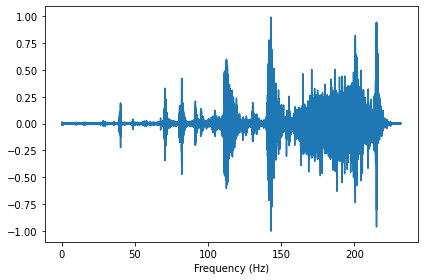

In [32]:
filtered.plot()
decorate(xlabel='Frequency (Hz)')

Before playing it back, I'll apodize it (to avoid clicks).

In [33]:
filtered.apodize()
# filtered.plot()
# decorate(xlabel='Time (s)')

And I'll do the same with the original segment.

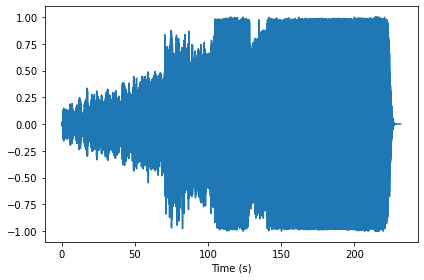

In [34]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

##### Testing the two versions (the original and the filtered)

Finally, we can listen to the original segment and the filtered version.

In [35]:
# segment.make_audio()

In [36]:
# filtered.make_audio()

##### Interacting with duration and filter

In [37]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [38]:
# from ipywidgets import interact, fixed

# interact(filter_wave, wave=fixed(wave), 
#          start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

In [39]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 20, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

----

### Plotting

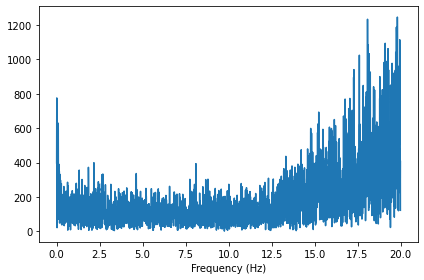

In [40]:
spectrum.plot(high=20)
decorate(xlabel='Frequency (Hz)')
# plt.savefig('imgs/output/1-_01-Iraq-1.pdf', dpi=300)

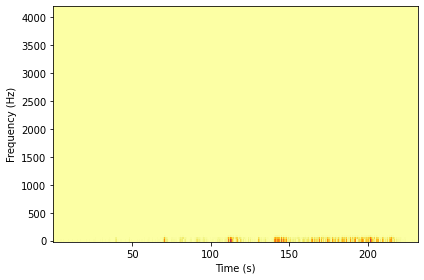

In [41]:
spectro = filtered.make_spectrogram(seg_length=1024)
spectro.plot(high=4200)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')
# plt.savefig('imgs/output/1-_01-Iraq-2.pdf', dpi=300)

(0.0, 2.0)

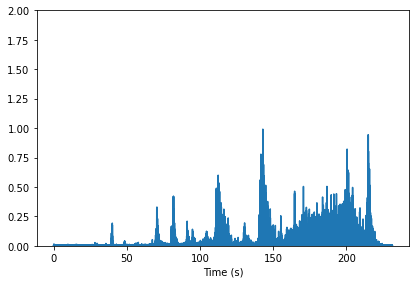

In [42]:
filtered.plot()
decorate(xlabel='Time (s)')
# plt.figure(figsize=(30,10))
plt.ylim(0, 2)
# plt.savefig('imgs/output/1-_01-Iraq-3.pdf', dpi=300)

In [43]:
# spectrum.plot(high=20)
# decorate(xlabel='Frequency (Hz)')
# plt.savefig('imgs/output/edelweiss.pdf', dpi=300)

In [44]:
# filtered

In [45]:
# fig = filtered.plot()

----

##### Spectrogram Color Schemes

In [46]:
# # AudioName = test3
# AudioName = '../data/source/soundtracks/wav-files-3/10-_20---29-Neibolt-Street.wav'

In [47]:
# from spectrum import Spectrogram, readwav
# data, samplerate = readwav(AudioName)

# p = Spectrogram(data, ws=128, W=4096, sampling=samplerate)
# p.periodogram()
# # fig = plt.figure(figsize=(30,10), dpi = 300)
# # axis([-0.5, 0.5, -60, 0]), 
# p.plot()
# # plt.savefig('imgs/output/10-_20---29-Neibolt-Street-spectro1.pdf')  

In [48]:
# from spectrum import Spectrogram, readwav
# data, samplerate = readwav(AudioName)

# p = Spectrogram(data, ws=128, W=4096, sampling=samplerate)
# p.periodogram()
# fig = plt.figure(figsize=(30,10), dpi = 300)
# # axis([-0.5, 0.5, -60, 0]), 
# p.plot(cmap='magma')
# plt.savefig('imgs/output/10-_20---29-Neibolt-Street-spectro2.pdf')  

In [49]:
# from spectrum import Spectrogram, readwav
# data, samplerate = readwav(AudioName)

# p = Spectrogram(data, ws=128, W=4096, sampling=samplerate)
# p.periodogram()
# # fig = plt.figure(figsize=(30,10), dpi = 300)
# # axis([-0.5, 0.5, -60, 0]), 
# fig = plt.figure(figsize=(30,10), dpi = 300)
# p.plot(cmap='bone')
# plt.savefig('imgs/output/10-_20---29-Neibolt-Street-spectro3.pdf')  

##### Filtered recordings

In [50]:
# AudioName = filtered

In [51]:
# from spectrum import Spectrogram, readwav
# data, samplerate = readwav(AudioName)

# p = Spectrogram(data, ws=128, W=4096, sampling=samplerate)
# p.periodogram()
# fig = plt.figure(figsize=(30,10), dpi = 300)
# # axis([-0.5, 0.5, -60, 0]), 
# p.plot()